In [1]:
# imports

import os
import sys
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal
from sklearn import preprocessing

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
HEPART_data = pd.read_csv("/home/seamus/GitHub/aitiaexplorer/src/aitia_explorer/target_data/data/HEPARTWO100.csv")
HEPART_data

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,absent,absent,absent,absent,absent,absent,present,present,absent,absent,...,absent,present,a49_30,absent,present,absent,absent,present,absent,absent
1,absent,absent,absent,absent,absent,present,present,present,absent,absent,...,present,present,a70_50,present,absent,absent,absent,absent,absent,absent
2,absent,absent,absent,absent,absent,present,absent,absent,present,absent,...,present,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
3,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent,...,present,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
4,absent,present,absent,absent,absent,absent,absent,absent,absent,absent,...,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,absent,absent,absent,absent,present,absent,absent,absent,absent,absent,...,absent,absent,a29_0,absent,absent,absent,absent,absent,absent,absent
96,absent,absent,absent,absent,present,absent,present,present,present,absent,...,present,present,a70_50,present,absent,absent,absent,absent,absent,absent
97,absent,present,absent,absent,absent,absent,absent,absent,absent,absent,...,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
98,absent,absent,absent,absent,absent,present,absent,absent,absent,absent,...,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent


In [3]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

df = HEPART_data.apply(le.fit_transform)
df

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,0,0,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,0
1,0,0,0,0,0,1,1,1,0,0,...,1,1,2,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,1,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,1,0,1,1,1,0,...,1,1,2,1,0,0,0,0,0,0
97,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
98,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.50)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data = principal_components)

In [37]:
pca.explained_variance_ratio_

array([0.05864818, 0.05511842, 0.04693587, 0.04411734, 0.040113  ,
       0.03753628, 0.03607488, 0.03447354, 0.03319286, 0.03178497,
       0.03115488, 0.02836527, 0.02768028])

In [38]:
len(pca.explained_variance_ratio_)

13

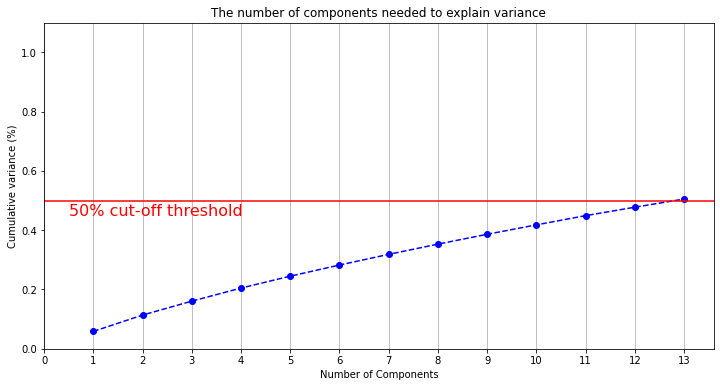

In [40]:
%matplotlib inline
n_comps = len(pca.explained_variance_ratio_)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, n_comps+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n_comps+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.50, color='r', linestyle='-')
plt.text(0.5, 0.45, '50% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
%run CommonCodeForExperiments.ipynb

In [31]:
aitia = App()

In [38]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)

In [33]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary

In [12]:
pc = pycausal()
pc.start_vm()

In [ ]:
analysis_results, summary = run_causal_discovery(df, None, algorithm_list, pc)
summary